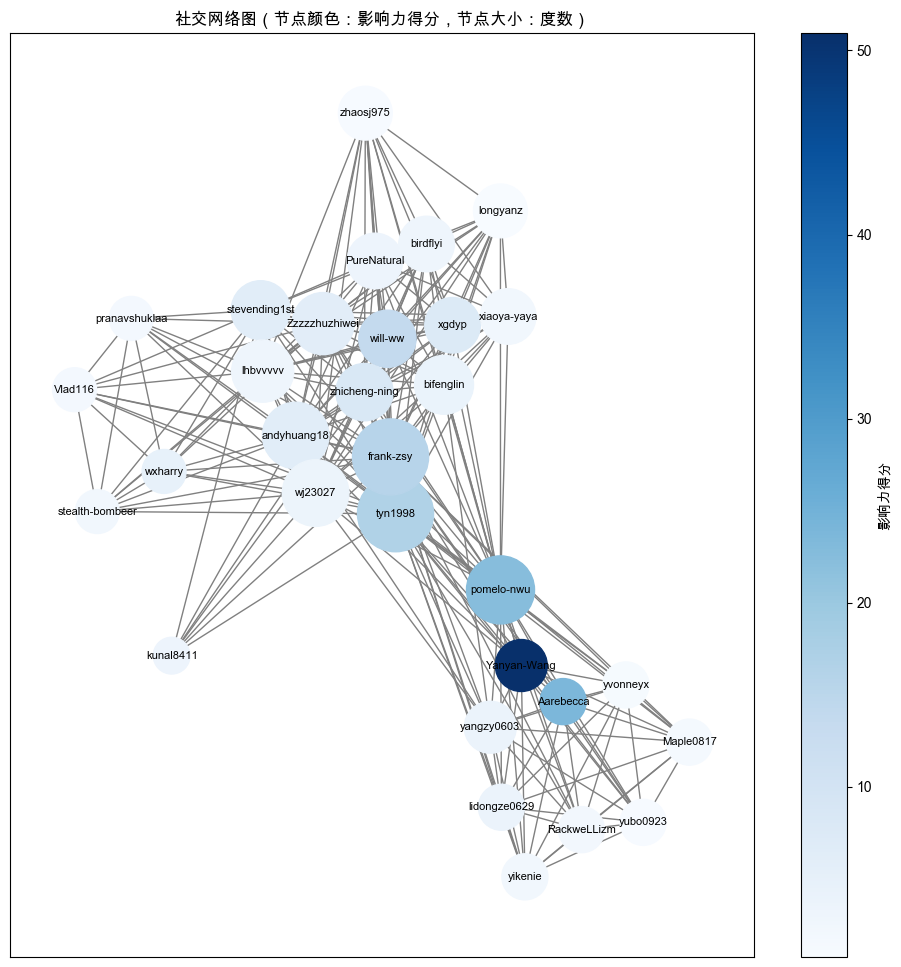

每个用户的直接朋友: {'Yanyan-Wang': ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin'], 'Aarebecca': ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy'], 'pomelo-nwu': ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975'], 'tyn1998': ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629', 'yvon

In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# 设置字体为支持中文的字体，例如 Arial Unicode MS 或 macOS 字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 或者尝试 ['PingFang SC'] 或 ['Heiti SC']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


# 1. 数据加载和社交网络构建
# 从 JSON 文件加载数据
with open('/Users/calanthe/Desktop/github作业/Homework4/hw4_data.json', 'r') as f:
    data = json.load(f)

nodes = data["nodes"]
edges = data["edges"]

# 初始化图表
G = nx.Graph()

# 将节点添加到图中
for node in nodes:
    G.add_node(node[0], influence_score=node[1])

# 将边关系添加到图中
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# 2. 社交网络构建与分析
# a. 使用邻接字典表示社交关系
adj_dict = {node: dict(G[node]) for node in G.nodes()}

# b. 找出每个用户的直接朋友
friends_dict = {node: list(G.neighbors(node)) for node in G.nodes()}

# 3. 统计与度中心性分析
# a. 计算每个用户的度数并找出度数最多的前5个用户
degree_dict = {node: len(friends) for node, friends in friends_dict.items()}
top_5_by_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# b. 找出影响力最高的前5个用户
influence_dict = {node[0]: node[1] for node in nodes}
top_5_by_influence = sorted(influence_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# c. 综合考虑影响力和朋友数量（加权 50% 影响力 + 50% 度数）
combined_score = {node: influence_dict[node] * 0.5 + degree_dict[node] * 0.5 for node in G.nodes()}
top_5_combined = sorted(combined_score.items(), key=lambda x: x[1], reverse=True)[:5]

# 4. 推荐新朋友
# a. 推荐 Yanyan-Wang 的“朋友的朋友”
yanyan_friends = set(friends_dict["Yanyan-Wang"])
friends_of_friends = {}

for friend in yanyan_friends:
    for fof in G.neighbors(friend):
        if fof != "Yanyan-Wang" and fof not in yanyan_friends:
            friends_of_friends[fof] = friends_of_friends.get(fof, 0) + 1

recommended_friends = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)

# b. 找出与 Yanyan-Wang 连接强度最高的5个用户
edge_weights = {neighbor: G["Yanyan-Wang"][neighbor]["weight"] for neighbor in G.neighbors("Yanyan-Wang")}
top_5_by_weight = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)[:5]

# 5. 网络图的可视化
# 绘制社交网络图，按影响力分数着色，节点大小表示度数
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

# 使用 node_color 显示影响力分数，node_size 显示度数
node_colors = [G.nodes[node]["influence_score"] for node in G.nodes()]
node_sizes = [degree_dict[node] * 100 for node in G.nodes()]  # 放大显示

# 绘制网络图
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=8)

# 添加颜色条
plt.colorbar(nodes, label="影响力得分")
plt.title("社交网络图（节点颜色：影响力得分，节点大小：度数）")
plt.show()


# 打印结果
print("每个用户的直接朋友:", friends_dict)
print("度数最高的前5个用户:", top_5_by_degree)
print("影响力最高的前5个用户:", top_5_by_influence)
print("最有影响力的用户（结合度数和影响力）:", top_5_combined)
print("推荐 Yanyan-Wang 的新朋友:", recommended_friends)
print("与 Yanyan-Wang 连接强度最高的5个用户:", top_5_by_weight)
